<a href="https://colab.research.google.com/github/charmi-devisetty/PRODIGY_DS_04/blob/main/prodigy_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/twitter_training.csv", header=None, names=["id", "entity", "sentiment", "text"])


In [ ]:
print(df.head())

     id       entity sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [ ]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)


In [ ]:
sentiment_counts = df['sentiment'].value_counts()
print("\nSentiment Distribution:\n", sentiment_counts)



Sentiment Distribution:
 sentiment
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64


/tmp/ipython-input-7-2375761940.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', order=sentiment_counts.index, palette="coolwarm")


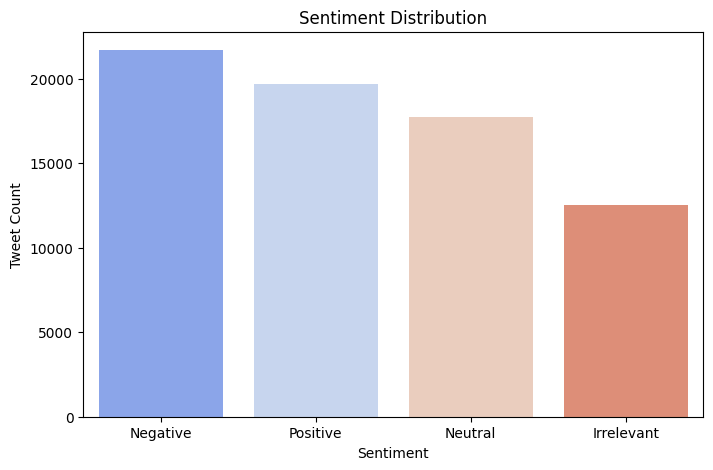

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', order=sentiment_counts.index, palette="coolwarm")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

In [ ]:
entity_sentiment = df.groupby(['entity', 'sentiment']).size().unstack().fillna(0)
top_entities = entity_sentiment.sum(axis=1).sort_values(ascending=False).head(10)
top_entity_sentiments = entity_sentiment.loc[top_entities.index]

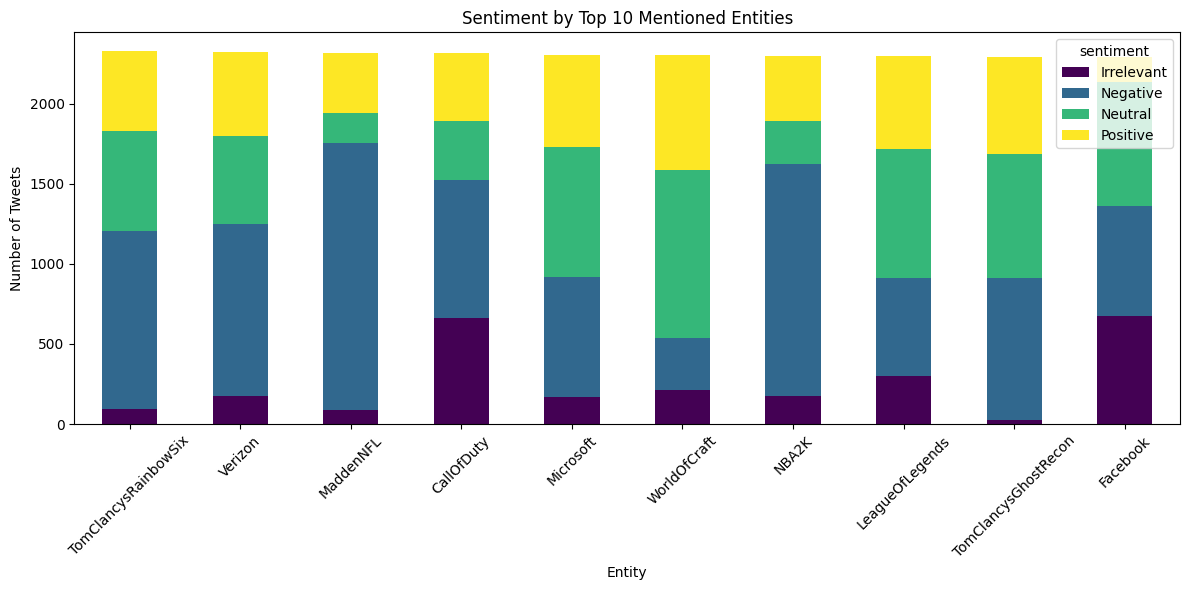

In [ ]:
top_entity_sentiments.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="viridis")
plt.title("Sentiment by Top 10 Mentioned Entities")
plt.xlabel("Entity")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
